In [27]:
#Importing Libraries
print('Importing Libraries....')
print('')

import numpy as np
import skimage as sk
import pandas as pd
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
# import cv2
import sys
import matplotlib.pyplot as plt
import scipy
from skimage import color
from skimage.transform import resize
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
print('Libraries Imported Successfully...')


Importing Libraries....

Libraries Imported Successfully...


In [28]:
#reading Dataset
print('Reading the  CSV file.....')
dataset=pd.read_csv('./fer2013.csv')
# print(dataset.head())
print('File successfully read!')

Reading the  CSV file.....
File successfully read!


In [29]:
#splitting the values of dataset into X and Y values
Y_data=dataset.values[:,0].reshape(-1,1)
X_data=dataset.values[:,1].reshape(-1,1)
X_datlist=[]

print('Getting the X-Values and Y-Values from Dataset.')
print('Please Wait....')
for x in X_data:
    l1=list(x)
    m1=list(map(float,l1[0].split()))
    X_datlist.append(np.asarray(m1))
X_datlist=np.asarray(X_datlist)

Y_data_mat=[]
for i in range(len(Y_data)):
    x1=Y_data[i][0]

    Y_data_mat.append(x1)

Y_data=np.asarray(Y_data_mat)

print('')
print('Success Achieved ....')

Getting the X-Values and Y-Values from Dataset.
Please Wait....

Success Achieved ....


In [30]:
#Getting the training and testing data ready
print('Converting Data into Training and Testing...')
X_train,X_test,Y_train,Y_test=train_test_split(X_datlist,Y_data,test_size=0.1)
print('')
print('Converted Successfully.')

Converting Data into Training and Testing...

Converted Successfully.


In [31]:
# Fitting Random Forest Classification to the Training set
print('Getting the model ready...')
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42,class_weight="balanced")
print('Fitting the necessary data values...')
classifier.fit(X_train,Y_train)

print('Model is Ready for Use...')

Getting the model ready...
Fitting the necessary data values...
Model is Ready for Use...


In [32]:
print('Checking the accuracy over Testing Data')
Y_pred=classifier.predict(X_test)
print('Accuracy of the Model is ',(accuracy_score(Y_pred,Y_test)*100),'%')

Checking the accuracy over Testing Data
Accuracy of the Model is  45.86235720256339 %


Reading the Image...

Done..

Probability of being Anger     -->  15.0 %
Probability of being Disgust   -->  3.0 %
Probability of having Fear     -->  17.540739268680447 %
Probability of being Happy     -->  14.000000000000002 %
Probability of being Sad       -->  30.459260731319553 %
Probability of being Surprised -->  5.0 %
Probability of being Neutral   -->  15.0 %


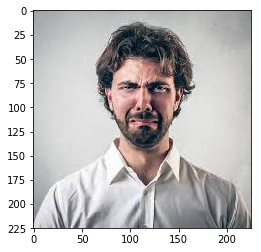

In [40]:
print('Reading the Image...\n')

if not sys.warnoptions:
    warnings.simplefilter("ignore")

strimage="sad.jpeg"    
img = io.imread(strimage, as_gray=True)
image_resized = resize(img, (48, 48), anti_aliasing=True)
X_get=[]
for i in range(48):
    for j in range(48):
        X_get.append((int(round(image_resized[i][j]*210))))
X_get=np.asarray(X_get).reshape(-1,1)
X_get=np.transpose(X_get)
predictions = classifier.predict_proba(X_get)

# showing image
image = np.array(scipy.ndimage.imread(strimage, flatten=False))
plt.imshow(image)
        
print('Done..\n')
print("Probability of being Anger     --> ",predictions[0][0]*100,"%")
print("Probability of being Disgust   --> ",predictions[0][1]*100,"%")
print("Probability of having Fear     --> ",predictions[0][2]*100,"%")
print("Probability of being Happy     --> ",predictions[0][3]*100,"%")
print("Probability of being Sad       --> ",predictions[0][4]*100,"%")
print("Probability of being Surprised --> ",predictions[0][5]*100,"%")
print("Probability of being Neutral   --> ",predictions[0][6]*100,"%")
        

    